# Regresión lineal del precio de la vivienda en EE. UU.

## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline


In [84]:
#df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [85]:
df = df.drop(columns=['Name', 'Doctor', 'Hospital', 'Room Number'])
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,2022-07-29,UnitedHealthcare,39606.840083,Elective,2022-08-02,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,2022-01-06,Blue Cross,5995.717488,Emergency,2022-01-29,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,2022-07-01,Blue Cross,49559.202905,Elective,2022-07-15,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,2020-02-06,UnitedHealthcare,25236.344761,Urgent,2020-02-26,Penicillin,Normal


In [86]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Hospital Stay (days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Hospital Stay (days)
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,14
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,30
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,2022-07-29,UnitedHealthcare,39606.840083,Elective,2022-08-02,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,2022-01-06,Blue Cross,5995.717488,Emergency,2022-01-29,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,2022-07-01,Blue Cross,49559.202905,Elective,2022-07-15,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,2020-02-06,UnitedHealthcare,25236.344761,Urgent,2020-02-26,Penicillin,Normal,20


In [87]:
df = df.drop(columns=['Date of Admission', 'Discharge Date'])
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Hospital Stay (days)
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal,20


In [88]:
print(df.head())

   Age  Gender Blood Type Medical Condition Insurance Provider  \
0   81  Female         O-          Diabetes           Medicare   
1   35    Male         O+            Asthma   UnitedHealthcare   
2   61    Male         B-           Obesity           Medicare   
3   49    Male         B-            Asthma           Medicare   
4   51    Male         O-         Arthritis   UnitedHealthcare   

   Billing Amount Admission Type   Medication  Test Results  \
0    37490.983364       Elective      Aspirin  Inconclusive   
1    47304.064845      Emergency      Lipitor        Normal   
2    36874.896997      Emergency      Lipitor        Normal   
3    23303.322092         Urgent   Penicillin      Abnormal   
4    18086.344184         Urgent  Paracetamol        Normal   

   Hospital Stay (days)  
0                    14  
1                    14  
2                    30  
3                     1  
4                    24  


In [90]:
for col in df.columns:
    print(f"\n Columna: {col}")
    print(df[col].unique())



 Columna: Age
[81 35 61 49 51 41 82 55 33 39 45 23 85 72 65 32 64 66 80 79 54 26 70 74
 56 37 78 83 30 19 46 48 34 84 47 60 57 21 27 68 31 42 71 38 28 43 69 73
 67 44 20 59 76 40 36 29 53 77 24 75 25 62 52 50 22 63 58 18]

 Columna: Gender
['Female' 'Male']

 Columna: Blood Type
['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']

 Columna: Medical Condition
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']

 Columna: Insurance Provider
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']

 Columna: Billing Amount
[37490.98336353 47304.06484548 36874.89699661 ... 49559.20290467
 25236.34476098 37223.96586473]

 Columna: Admission Type
['Elective' 'Emergency' 'Urgent']

 Columna: Medication
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']

 Columna: Test Results
['Inconclusive' 'Normal' 'Abnormal']

 Columna: Hospital Stay (days)
[14 30  1 24  3 17  5 28 15 16 20  7 19  8 10 23 21 29 27 25 12 22  2 18
  4  6  9 11 13 26]


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [91]:

# Paso 0: Importar librerías
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Paso 2: Transformar columna Gender (LabelEncoder)
# Gender solo tiene 2 categorías -> LabelEncoder
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])
print("\nClases en Gender:", le_gender.classes_)

#  Paso 3: OneHotEncoder para columnas con varias categorías

ohe_cols = ["Blood Type", "Medical Condition", "Insurance Provider",
            "Admission Type", "Medication"]

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe_data = ohe.fit_transform(df[ohe_cols])

# Convertir resultado a DataFrame
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(ohe_cols))

# Unir con el dataset y eliminar columnas originales
df = pd.concat([df.drop(columns=ohe_cols).reset_index(drop=True),
                ohe_df.reset_index(drop=True)], axis=1)

print("\nColumnas creadas por OneHotEncoder:")
print(ohe.get_feature_names_out(ohe_cols))

#  Paso 4: Transformar Test Results (LabelEncoder)

le_test = LabelEncoder()
df["Test Results"] = le_test.fit_transform(df["Test Results"])
print("\nClases en Test Results:", le_test.classes_)
# ['Abnormal', 'Inconclusive', 'Normal']

# Paso 5: Escalar columnas numéricas

cols_to_scale = ["Age", "Billing Amount", "Hospital Stay (days)"]

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

#  Paso 6: Revisar dataset final

print("\nInformación final del dataset:")
print(df.info())

print("\nPrimeras filas después de la transformación:")
print(df.head())

print("\nEstadísticas descriptivas del dataset final:")
print(df.describe())



Clases en Gender: ['Female' 'Male']

Columnas creadas por OneHotEncoder:
['Blood Type_A-' 'Blood Type_AB+' 'Blood Type_AB-' 'Blood Type_B+'
 'Blood Type_B-' 'Blood Type_O+' 'Blood Type_O-'
 'Medical Condition_Asthma' 'Medical Condition_Cancer'
 'Medical Condition_Diabetes' 'Medical Condition_Hypertension'
 'Medical Condition_Obesity' 'Insurance Provider_Blue Cross'
 'Insurance Provider_Cigna' 'Insurance Provider_Medicare'
 'Insurance Provider_UnitedHealthcare' 'Admission Type_Emergency'
 'Admission Type_Urgent' 'Medication_Ibuprofen' 'Medication_Lipitor'
 'Medication_Paracetamol' 'Medication_Penicillin']

Clases en Test Results: ['Abnormal' 'Inconclusive' 'Normal']

Información final del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-n

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [92]:
print("\nInformación final del dataset:")
print(df.info())

print("\nPrimeras filas después de la transformación:")
print(df.head())

print("\nEstadísticas descriptivas del dataset final:")
print(df.describe())



Información final del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  float64
 1   Gender                               10000 non-null  int64  
 2   Billing Amount                       10000 non-null  float64
 3   Test Results                         10000 non-null  int64  
 4   Hospital Stay (days)                 10000 non-null  float64
 5   Blood Type_A-                        10000 non-null  float64
 6   Blood Type_AB+                       10000 non-null  float64
 7   Blood Type_AB-                       10000 non-null  float64
 8   Blood Type_B+                        10000 non-null  float64
 9   Blood Type_B-                        10000 non-null  float64
 10  Blood Type_O+                        10000 non-null  float64
 1

**El método 'columns' obtiene los nombres de las columnas (características)**

In [93]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  float64
 1   Gender                               10000 non-null  int64  
 2   Billing Amount                       10000 non-null  float64
 3   Test Results                         10000 non-null  int64  
 4   Hospital Stay (days)                 10000 non-null  float64
 5   Blood Type_A-                        10000 non-null  float64
 6   Blood Type_AB+                       10000 non-null  float64
 7   Blood Type_AB-                       10000 non-null  float64
 8   Blood Type_B+                        10000 non-null  float64
 9   Blood Type_B-                        10000 non-null  float64
 10  Blood Type_O+                        10000 non-null  float64
 11  Blood Type_O-                

In [94]:
df.describe()

,Age,Gender,Billing Amount,Test Results,Hospital Stay (days),Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.136868e-16,0.492500,3.410605e-17,0.981100,3.197442e-17,0.12380,0.12580,0.127500,0.124400,0.125200,...,0.2032,0.204000,0.192500,0.19780,0.336700,0.339100,0.197600,0.201500,0.196200,0.207900
std,1.000050e+00,0.499969,1.000050e+00,0.819762,1.000050e+00,0.32937,0.33164,0.333549,0.330054,0.330962,...,0.4024,0.402989,0.394283,0.39836,0.472605,0.473428,0.398209,0.401141,0.397141,0.405825
min,-1.707791e+00,0.000000,-1.742898e+00,0.000000,-1.690950e+00,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.399124e-01,0.000000,-8.538163e-01,0.000000,-8.780939e-01,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.796611e-02,0.000000,-1.839068e-02,1.000000,5.088481e-02,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.447930e-01,1.000000,8.685195e-01,2.000000,8.637412e-01,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.712672e+00,1.000000,1.740230e+00,2.000000,1.676598e+00,1.00000,1.00000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
features = [
    'Age',
    'Gender',
    'Hospital Stay (days)',
    'Admission Type_Emergency',
    'Admission Type_Urgent'
]
X = df[features]

In [95]:
df.columns

Index(['Age', 'Gender', 'Billing Amount', 'Test Results',
       'Hospital Stay (days)', 'Blood Type_A-', 'Blood Type_AB+',
       'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+',
       'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Cigna', 'Insurance Provider_Medicare',
       'Insurance Provider_UnitedHealthcare', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Ibuprofen', 'Medication_Lipitor',
       'Medication_Paracetamol', 'Medication_Penicillin'],
      dtype='object')

In [97]:
# Muestra las primeras 10 filas de tus features
X.head(10)

,Age,Gender,Hospital Stay (days),Admission Type_Emergency,Admission Type_Urgent
0,1.508465,0,-0.181360,0.0,0.0
1,-0.839912,1,-0.181360,1.0,0.0
2,0.487431,1,1.676598,1.0,0.0
3,-0.125189,1,-1.690950,0.0,1.0
4,-0.023086,1,0.979864,0.0,1.0
5,-0.533602,1,-1.458706,0.0,1.0
6,1.559516,1,0.979864,0.0,1.0
7,0.181121,0,0.167007,0.0,0.0
8,-0.942016,1,-1.226461,0.0,0.0
9,-0.635706,0,-1.690950,0.0,1.0


In [98]:
y = df['Test Results']

In [99]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features,
    y,
    test_size=0.30,
    random_state=101
)

In [102]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predicciones
pred = knn.predict(X_test)

In [107]:
# Matriz de confusión
conf_mat = confusion_matrix(y_test, pred)
print("Matriz de confusión:\n", conf_mat)

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, pred))

# Tasa de error
error_rate = round(np.mean(pred != y_test), 3)
print("Tasa de error de clasificación errónea:", error_rate)

# ✅ Accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy del modelo:", round(accuracy, 3))  # redondeado a 3 decimales

Matriz de confusión:
 [[439 357 234]
 [384 327 233]
 [437 324 265]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.35      0.43      0.38      1030
           1       0.32      0.35      0.34       944
           2       0.36      0.26      0.30      1026

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.35      0.34      0.34      3000

Tasa de error de clasificación errónea: 0.656
Accuracy del modelo: 0.344


In [108]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # proporción


Test Results
0    3456
1    3277
2    3267
Name: count, dtype: int64
Test Results
0    0.3456
1    0.3277
2    0.3267
Name: proportion, dtype: float64


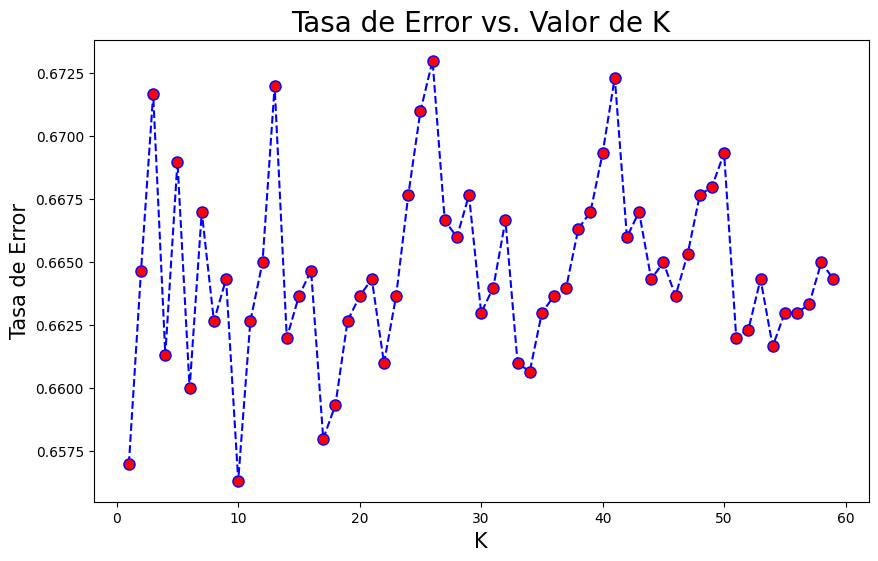

In [109]:
error_rate_list = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate_list.append(np.mean(pred_i != y_test))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), error_rate_list, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=8)
plt.title('Tasa de Error vs. Valor de K', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Tasa de Error', fontsize=15)
plt.show()

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

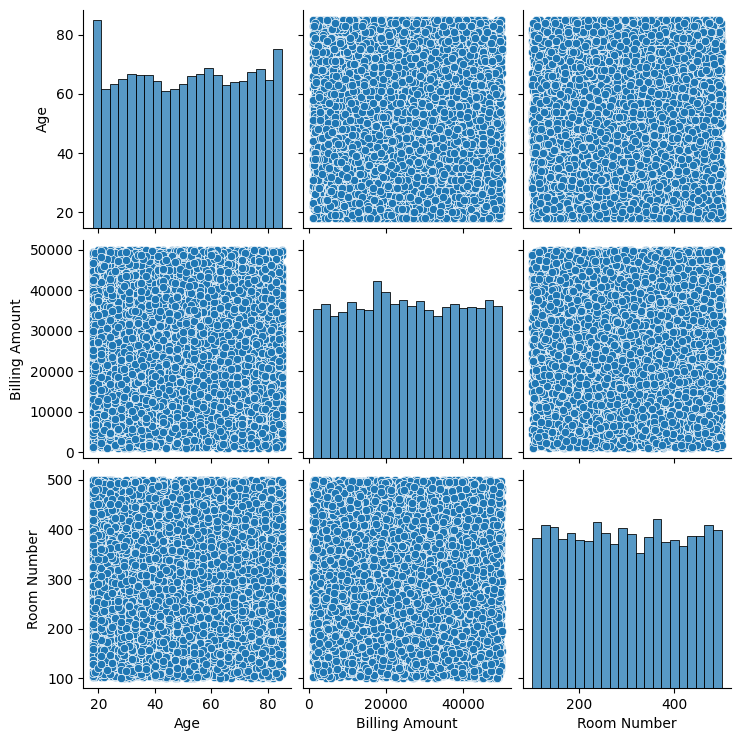

In [34]:
sns.pairplot(df)
plt.show()

**Distribución del precio (la cantidad prevista)**

<Axes: title={'center': 'Distribución de Test Results'}, xlabel='Test Results'>

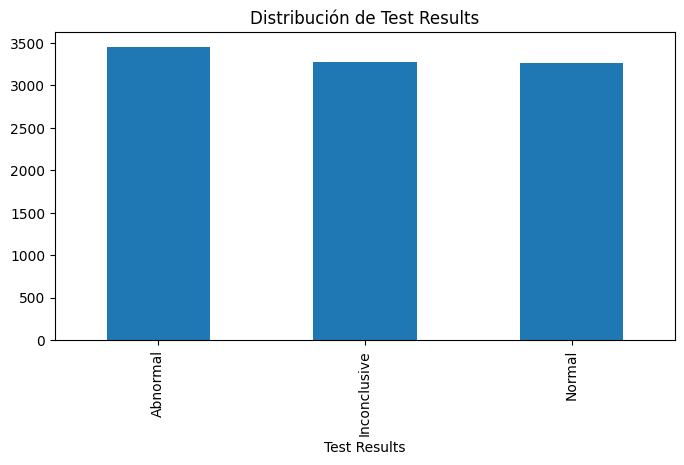

In [12]:
df['Test Results'].value_counts().plot(kind='bar', figsize=(8,4), title='Distribución de Test Results')


<Axes: title={'center': 'Density plot de Billing Amount'}, ylabel='Density'>

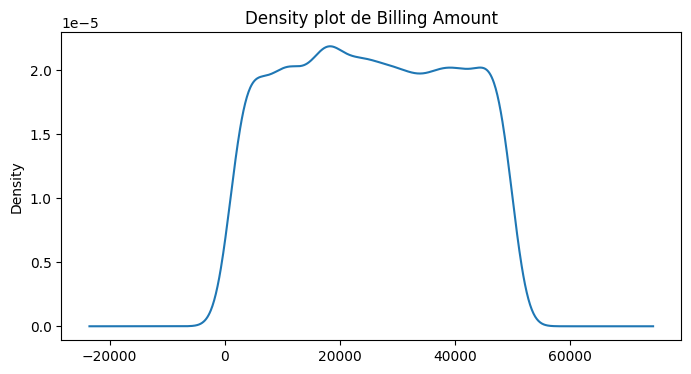

In [13]:
df['Billing Amount'].plot.density(figsize=(8,4), title='Density plot de Billing Amount')


**Matriz de correlación y heatmap**

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Age,Billing Amount,Room Number
Age,1.000000,-0.009483,-0.005371
Billing Amount,-0.009483,1.000000,-0.006160
Room Number,-0.005371,-0.006160,1.000000


<Axes: >

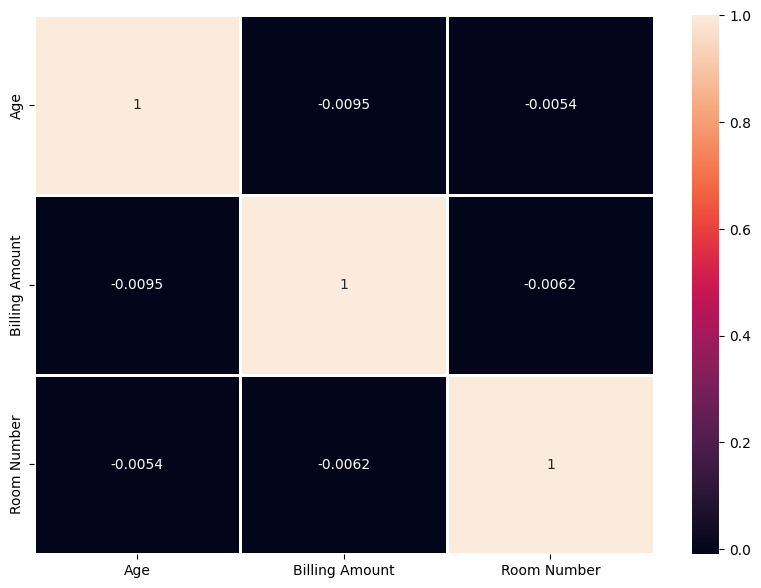

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)